In [1]:
!pip install import-ipynb

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"
import import_ipynb
from model_functions import *

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
importing Jupyter notebook from model_functions.ipynb


In [3]:
i = 1 
# data1 = np.load('/content/drive/My Drive/input/nor/1.npy') 
# data2 = np.load('/content/drive/My Drive/input/pre/1.npy') 
# data3 = np.load('/content/drive/My Drive/input/post/1.npy') 
# data4 = np.load('/content/drive/My Drive/input/fu/1.npy') 
tmp = np.load('/content/drive/My Drive/input/half30hz/' + str(i) + '.npy')
data = np.reshape(tmp,(96,6786,30))
Label = np.load('/content/drive/My Drive/ready_data_6C/output/output.npy')

# tmp1 = np.load('/content/drive/My Drive/input/half30hz/' + str(i+1) + '.npy')
# data1 = np.reshape(tmp1,(96,6786,30))
# tmp2 = np.load('/content/drive/My Drive/input/half30hz/' + str(i+2) + '.npy')
# data2 = np.reshape(tmp2,(96,6786,30)) 

# data = np.concatenate((data1,data2,data3,data4), axis = 0)
# data = np.reshape(data,(96, 116, 116, 30, 1))
print(data.shape)
# print(data1.shape)
print(Label.shape)
# print(tmp.shape)

(96, 6786, 30)
(96, 3)


In [0]:
def SPLIT(data,split):

  data, label = shuffle(data, Label, random_state=20)

  train_data = data[:split]
  train_label = label[:split]
  test_data = data[split:]
  test_label = label[split:]

  return train_data, train_label, test_data, test_label


train_data, train_label, test_data, test_label = SPLIT(data,72)
# train_data1, train_label1, test_data1, test_label1 = SPLIT(data1,72)
# train_data2, train_label2, test_data2, test_label2 = SPLIT(data2,72)

In [4]:
print(train_data.shape)
print(train_label.shape)

(72, 6786, 30)
(72, 3)


In [0]:
# seed = 7 

# cvscores = []
# kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
# for train, test in kfold.split(train_data, train_label):
#   # create model
#     model = get_model100()
#     # Compile model
#     # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     # Fit the model
#     model.fit(train_data[train], train_label[train], epochs=150, batch_size=6, verbose=0)
# # evaluate the model
#     scores = model.evaluate(train_data[test], train_label[test], verbose=0)
#     # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#     # cvscores.append(scores[1] * 100)
# # print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

In [0]:
def k_fold(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 1000
  batchsize = 6
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = get_model100()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mse_history = history.history['loss']
    mae_history = history.history['mean_absolute_error']
    val_mses.append(val_mse)
    val_maes.append(val_mae)
    mse_History.append(mse_history)
    mae_History.append(mae_history)
    average_mae_history = [(np.mean([x[i] for x in mae_History]))*100 for i in range(100)] 
    average_mse_history = [(np.mean([x[i] for x in mse_History]))*100 for i in range(100)] 
  return val_mses, val_maes, average_mse_history, average_mae_history


def k_fold1(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 1000
  batchsize = 6
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = get_model101()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mse_history = history.history['loss']
    mae_history = history.history['mean_absolute_error']
    val_mses.append(val_mse)
    val_maes.append(val_mae)
    mse_History.append(mse_history)
    mae_History.append(mae_history)
    average_mae_history = [(np.mean([x[i] for x in mae_History]))*100 for i in range(100)] 
    average_mse_history = [(np.mean([x[i] for x in mse_History]))*100 for i in range(100)] 
  return val_mses, val_maes, average_mse_history, average_mae_history


def k_fold2(k,train_data,train_targets):
  num_val_samples = len(train_data)//k
  val_mses = []
  val_maes = []
  mse_History = []
  mae_History = []
  num_epochs = 1000
  batchsize = 6
  for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = get_model102()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=batchsize, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mse_history = history.history['loss']
    mae_history = history.history['mean_absolute_error']
    val_mses.append(val_mse)
    val_maes.append(val_mae)
    mse_History.append(mse_history)
    mae_History.append(mae_history)
    average_mae_history = [(np.mean([x[i] for x in mae_History]))*100 for i in range(100)] 
    average_mse_history = [(np.mean([x[i] for x in mse_History]))*100 for i in range(100)] 
  return val_mses, val_maes, average_mse_history, average_mae_history




In [0]:
val_mses, val_maes, mse_history, mae_history = k_fold(4,train_data,train_label)
val_mses1, val_maes1, mse_history1, mae_history1 = k_fold1(4,train_data,train_label)
val_mses2, val_maes2, mse_history2, mae_history2 = k_fold2(4,train_data,train_label)

processing fold # 0



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 6786, 30)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 6786, 32)          992       
_________________________________________________________________
dense_2 (Dense)              (None, 6786, 64)          2112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 434304)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               111182080 
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 771       
Total params: 111,185,955
Trainable params: 111,185,955
Non-trainable params: 0
______________________

In [0]:
# print(np.mean(val_mses))
# print(np.mean(val_maes))
# print(mse_history)

0.03327906830236316
0.14828961342573166
[[0.05268226419058111, 0.027464825866950884, 0.022969970893528726, 0.017879969233440027, 0.014108565480758747, 0.011124660312715504, 0.00892561588746806, 0.007384195018352734, 0.006088971005131801, 0.005234116960006456, 0.0043646753894993, 0.003828862164583471, 0.0033073384288905393, 0.0029538138510866296, 0.0025157595260275733, 0.002184637440627234, 0.0018941869396561135, 0.0016574327310081571, 0.0014810151947636364, 0.0013057473859387552, 0.0011753283195301062, 0.0010481814517536098, 0.0009449965048891803, 0.0008764323574723676, 0.000797245666035451, 0.000727190227027879, 0.0006729870979648291, 0.0006196964839344017, 0.0005716729146014485, 0.0005327037805626686, 0.0004920321807730943, 0.00045728404074907303, 0.0004286739458621014, 0.000400182153195298, 0.0003749791883617743, 0.00035309284915759537, 0.0003315203616188632, 0.0003107840141941172, 0.00029546978961055476, 0.0002768591277547077, 0.00026291082536368375, 0.00024914634215949464, 0.00023

In [0]:
# average_mae_history = [(np.mean([x[i] for x in mae_history]))*100 for i in range(100)] 
# average_mse_history = [(np.mean([x[i] for x in mse_history]))*100 for i in range(100)] 
# average_mae_history = np.array(average_mae_history)
# average_mse_history = np.array(average_mse_history)
# print(average_mae_history.shape)
# print(len(average_mse_history))

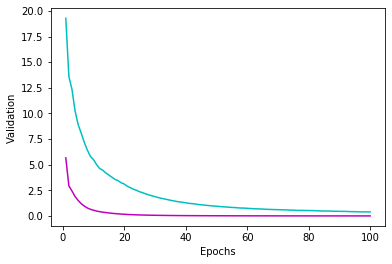

In [0]:
#model 101
epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, average_mae_history,'c',  label='mae' )
plt.plot(epochs, average_mse_history,'c--',  label='mse' )
plt.plot(epochs, average_mae_history1,'m',  label='mae' )
plt.plot(epochs, average_mse_history1,'m--',  label='mse' )
plt.plot(epochs, average_mae_history2,'g',  label='mae' )
plt.plot(epochs, average_mse_history2,'g--',  label='mse' )
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()

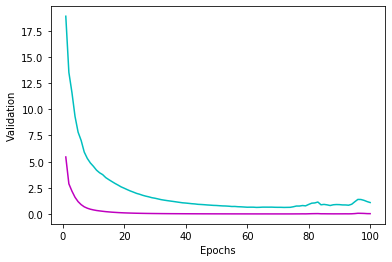

In [0]:
#model 100
epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, average_mae_history,'c',  label='mae' )
plt.plot(epochs, average_mse_history,'m',  label='mse' )
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()

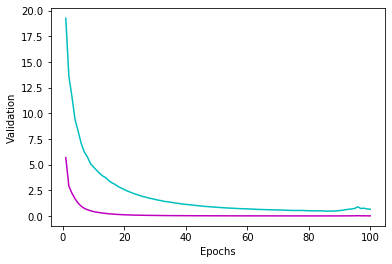

In [0]:
#model 102
epochs = range(1,len(average_mse_history)+1)
plt.plot(epochs, average_mae_history,'c',  label='mae' )
plt.plot(epochs, average_mse_history,'m',  label='mse' )
plt.xlabel('Epochs')
plt.ylabel('Validation')
plt.show()

In [0]:

model = get_model100()
history1 = model.fit(train_data, train_label,validation_split=0.2 , batch_size=batchsize, epochs = 100, verbose=0)
model1 = get_model100()
history2 = model1.fit(train_data1, train_label1, validation_split=0.2, batch_size=batchsize ,epochs = 100, verbose=0)
# model2 = get_model100()
# history3 = model2.fit(train_data2, train_label2, batch_size=batchsize, epochs = 100, verbose=0)


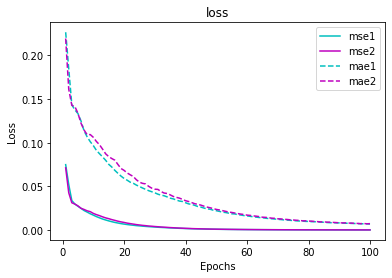

In [0]:
mse1 = history1.history['loss']
mse2 = history2.history['loss']
# mse3 = history3.history['loss']
mae1 = history1.history['mean_absolute_error']
mae2 = history2.history['mean_absolute_error']
# mae3 = history3.history['mean_absolute_error']

# val_loss = history.history['val_loss']
# acc = history.history['acc']
# val_acc=history.history['val_acc']
epochs = range(1,len(mse1) +1)
plt.plot(epochs, mse1, 'c', label='mse1')
plt.plot(epochs, mse2, 'm', label='mse2')
# plt.plot(epochs, mse3, 'r', label='mse3')
plt.plot(epochs, mae1, 'c--', label='mae1')
plt.plot(epochs, mae2, 'm--', label='mae2')
# plt.plot(epochs, mae3, 'r--', label='mae3')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [0]:
comparision1 = model.predict(test_data)
comparision2 =model1.predict(test_data1)
# comparision3 =model2.predict(test_data2)

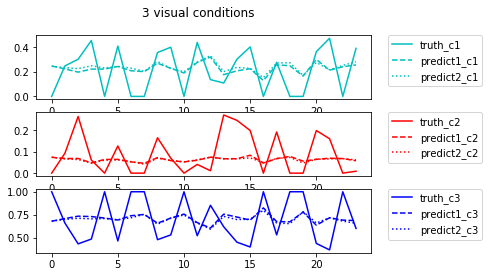

In [0]:
x_data = range(24)
y_data_c1 = test_label[:,0]
y_data_c2 = test_label[:,1]
y_data_c3 = test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]
y_predict2_c1 = comparision2[:,0]
y_predict2_c2 = comparision2[:,1]
y_predict2_c3 = comparision2[:,2]
# y_predict3_c1 = comparision3[:,0]
# y_predict3_c2 = comparision3[:,1]
# y_predict3_c3 = comparision3[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3)
fig.suptitle('3 visual conditions') 


predict_c1.plot(x_data, y_data_c1 , 'c', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'b', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'c--', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'r--', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'b--', label='predict1_c3')
predict_c1.plot(x_data, y_predict2_c1 , 'c:', label='predict2_c1')
predict_c2.plot(x_data, y_predict2_c2 , 'r:', label='predict2_c2')
predict_c3.plot(x_data, y_predict2_c3 , 'b:', label='predict2_c3')
# predict_c1.plot(x_data, y_predict3_c1 , 'c-.', label='predict3_c1')
# predict_c2.plot(x_data, y_predict3_c2 , 'r-.', label='predict3_c2')
# predict_c3.plot(x_data, y_predict3_c3 , 'b-.', label='predict3_c3')

predict_c1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# plt.title('loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show() 
# fig.savefig('/content/drive/My Drive/ready_data_6C/matrix_input/1.png' ,bbox_inches='tight')

In [0]:
print(comparision1.shape)
y_data_c1 = test_label[:,0]
print(y_data_c1.shape)

(24, 3)
(24,)


In [0]:
def calculate_mse(predict):   #对比三种视觉情况 每个model的mse  
  y_data_c1 = test_label[:,0]
  y_data_c2 = test_label[:,1]
  y_data_c3 = test_label[:,2]
  y_predict1_c1 = predict[:,0]
  y_predict1_c2 = predict[:,1]
  y_predict1_c3 = predict[:,2]
  tmp1 = 0
  tmp2 = 0
  tmp3 = 0
  for i in range(24):
    tmp1 = tmp1 + (y_data_c1[i]- y_predict1_c1[i])**2
    tmp2 = tmp2 + (y_data_c2[i]- y_predict1_c2[i])**2
    tmp3 = tmp3 + (y_data_c3[i]- y_predict1_c3[i])**2
  c1 = tmp1 /24 
  c2 = tmp2 /24
  c3 = tmp3 /24
  # c1 = K.mean(K.square( y_data_c1- y_predict1_c1), axis=-1)
  # c2 = K.mean(K.square( y_data_c2- y_predict1_c2), axis=-1)
  # c3 = K.mean(K.square( y_data_c3- y_predict1_c3), axis=-1)
  return c1 , c2 ,c3 


In [0]:
# from keras import backend as K
Model1 = calculate_mse(comparision1)
Model2 = calculate_mse(comparision2)

In [0]:
print(Model1)
print(Model2)

(0.02910617461301455, 0.009933270303755817, 0.034356681808861006)
(0.030634389161421072, 0.03981762178148307, 0.08559237445519267)
